# Exploratory Data Analysis

## Intro

This notebook intends to perform an initial exploration of the dataset for the expected goals model. This section is divided in three sections:

- Summary: A summary description of the dataset including its head, some metrics for each feature, its dtypes and their different value counts.

- Visualizations: This section includes plots of the shots in a Pitch, a pie chart for every different type of outcome and bar charts for various other features behave in relation to whether a given shot is a Goal or not.

- Data Issues: I will identify possible issues that may arise from data such as skewness and collinearity.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
from scipy.stats import skew
import cmasher as cmr
from mplsoccer.pitch import Pitch, VerticalPitch

plt.rcParams["figure.figsize"] = (12,8)

sns.set()

## Summary

In [2]:
df = pd.read_csv('../data/clean/xg/total_shots.csv')

In [3]:
df.head()

,minute,second,possession,duration,under_pressure,location_x,location_y,play,type,outcome,technique,body_part,first_time,one_on_one,aerial_won,pos,redirect,deflected,open_goal,follows_dribble
0,3,1,10,0.910700,0.0,115.0,34.3,From Corner,Open Play,Goal,Normal,Head,0.0,0.0,0.0,Right Center Back,0.0,0.0,0.0,0.0
1,5,7,13,0.809100,0.0,108.0,39.9,Other,Penalty,Goal,Normal,Right Foot,0.0,0.0,0.0,Center Forward,0.0,0.0,0.0,0.0
2,7,7,16,0.326300,0.0,94.7,42.4,Regular Play,Open Play,Blocked,Normal,Right Foot,0.0,0.0,0.0,Left Center Forward,0.0,0.0,0.0,0.0
3,8,3,19,3.355796,0.0,93.7,56.2,From Free Kick,Free Kick,Goal,Normal,Left Foot,0.0,0.0,0.0,Right Wing,0.0,0.0,0.0,0.0
4,13,2,25,1.183864,0.0,92.9,29.0,Regular Play,Open Play,Goal,Normal,Right Foot,0.0,0.0,0.0,Left Midfield,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22673 entries, 0 to 22672
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minute           22673 non-null  int64  
 1   second           22673 non-null  int64  
 2   possession       22673 non-null  int64  
 3   duration         22673 non-null  float64
 4   under_pressure   22673 non-null  float64
 5   location_x       22673 non-null  float64
 6   location_y       22673 non-null  float64
 7   play             22673 non-null  object 
 8   type             22673 non-null  object 
 9   outcome          22673 non-null  object 
 10  technique        22673 non-null  object 
 11  body_part        22673 non-null  object 
 12  first_time       22673 non-null  float64
 13  one_on_one       22673 non-null  float64
 14  aerial_won       22673 non-null  float64
 15  pos              22673 non-null  object 
 16  redirect         22673 non-null  float64
 17  deflected   

In [5]:
df.describe()

,minute,second,possession,duration,under_pressure,location_x,location_y,first_time,one_on_one,aerial_won,redirect,deflected,open_goal,follows_dribble
count,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000,22673.000000
mean,48.564151,29.481410,104.710713,0.841766,0.171085,103.738945,39.757491,0.268513,0.062321,0.060689,0.003308,0.010409,0.011688,0.001235
std,27.132967,17.310243,58.063476,0.573517,0.376591,8.930381,10.042374,0.443196,0.241743,0.238764,0.057420,0.101494,0.107479,0.035121
min,0.000000,0.000000,2.000000,0.000000,0.000000,45.300000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,15.000000,55.000000,0.398100,0.000000,97.500000,32.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,29.000000,105.000000,0.773000,0.000000,105.200000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,45.000000,151.000000,1.166403,0.000000,111.000000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,128.000000,59.000000,302.000000,6.150651,1.000000,120.000000,79.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_columns = df.columns.tolist()

for i in df_columns:
    print(f"\n" + str(df[i].value_counts(dropna=False)) + "\n")


46     337
45     316
91     284
56     281
47     280
      ... 
115      2
114      2
112      2
102      1
128      1
Name: minute, Length: 128, dtype: int64


42    408
1     408
22    407
7     401
18    401
45    401
0     400
48    399
46    399
16    396
19    394
11    392
50    392
29    389
52    389
49    389
24    385
5     385
57    384
54    384
14    384
35    382
30    382
53    382
34    382
23    381
8     381
28    380
43    380
27    379
36    378
40    378
21    377
56    377
20    376
25    376
44    375
31    374
39    374
41    374
2     372
3     372
12    370
26    369
55    367
10    364
37    364
4     363
9     362
59    361
38    361
13    360
32    360
15    358
51    357
47    357
58    350
17    349
33    345
6     337
Name: second, dtype: int64


139    151
73     143
151    143
31     141
117    140
      ... 
252      1
300      1
290      1
246      1
274      1
Name: possession, Length: 286, dtype: int64


0.973000    48
0.240000    44
0.200000  

---

## Plots

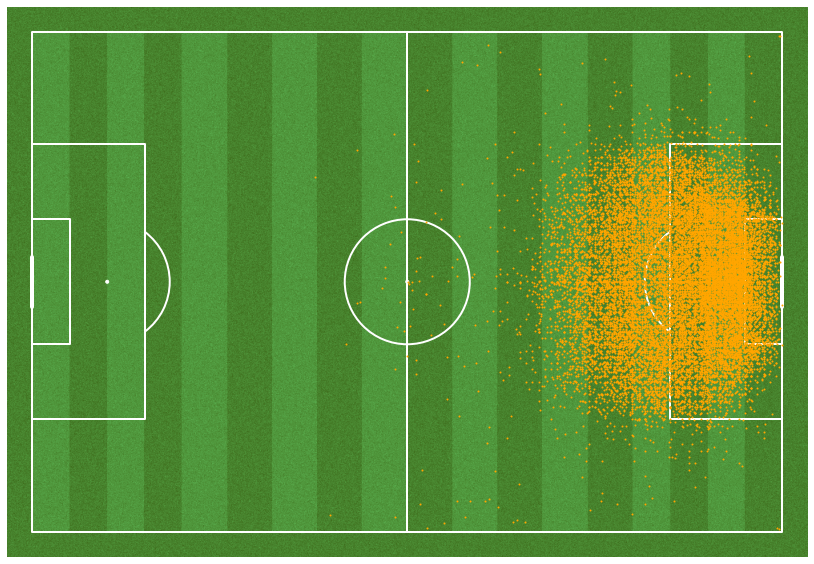

In [7]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(4.4, 6.4))

fig, ax = pitch.draw()

sc = pitch.scatter(df['location_x'], df['location_y'],s=1, label='scatter', ax=ax, color= 'orange')

As you can see in the plot above and below, shots tend funnel both closer to the goal and closer to the central areas.

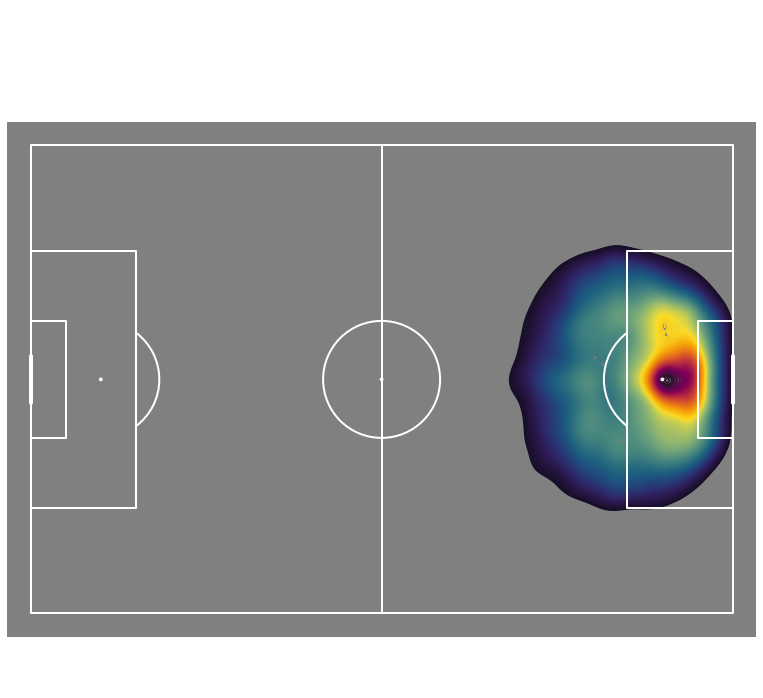

In [8]:
pitch = Pitch(line_zorder=2, figsize=(4.4, 6.4),pitch_color='gray')
fig, axs = pitch.grid(figheight=10,axis=False)

kde = pitch.kdeplot(df.location_x, df.location_y, ax=axs['pitch'],
                    levels=500,
                    cut=18,
                    cmap=cmr.pride)

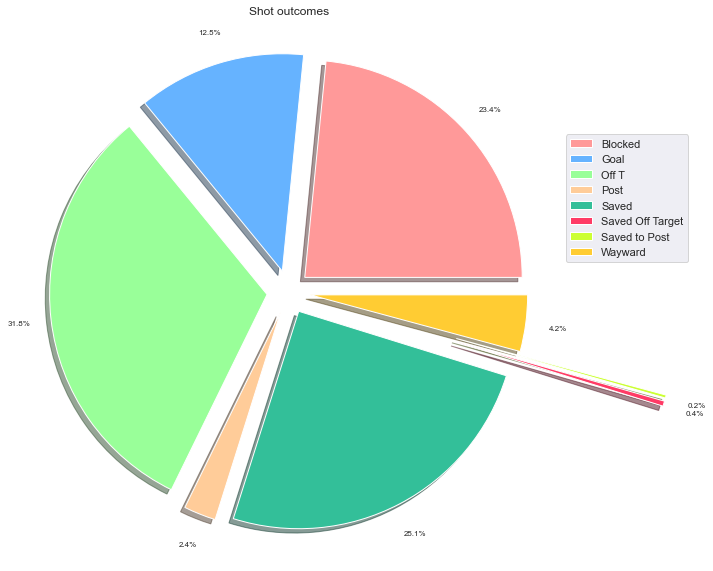

In [9]:
counts_per_outcome = df.groupby("outcome").count().iloc[:,1]
labels = counts_per_outcome.index.tolist()

plt.rcParams['font.size'] = 8
plt.rcParams["figure.figsize"] = (14,10)

# Occurrences per outcome type
outcomes = [outcome for outcome in counts_per_outcome]

# color map
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#33bf99','#ff3b66','#ccff33','#ffcc33']


distance_between_slices = [0.1,0.1,0.1,0.1,0.1,0.8,0.8,0.1]

plt.pie(x = outcomes, autopct="%.1f%%",explode=distance_between_slices,shadow=True,
        pctdistance=1.15, rotatelabels=True, colors=colors)

plt.legend(labels=labels, bbox_to_anchor=(1,0.8))
plt.title("Shot outcomes",fontdict={"fontsize":12})
plt.show()

The shots outcomes are dristributed in a relatively even manner. While shots being saved coming off target and saved to post are by far the rarest, 4 different outcomes are the most common in the distribution : Blocked, Goals, Off Target and Saved.

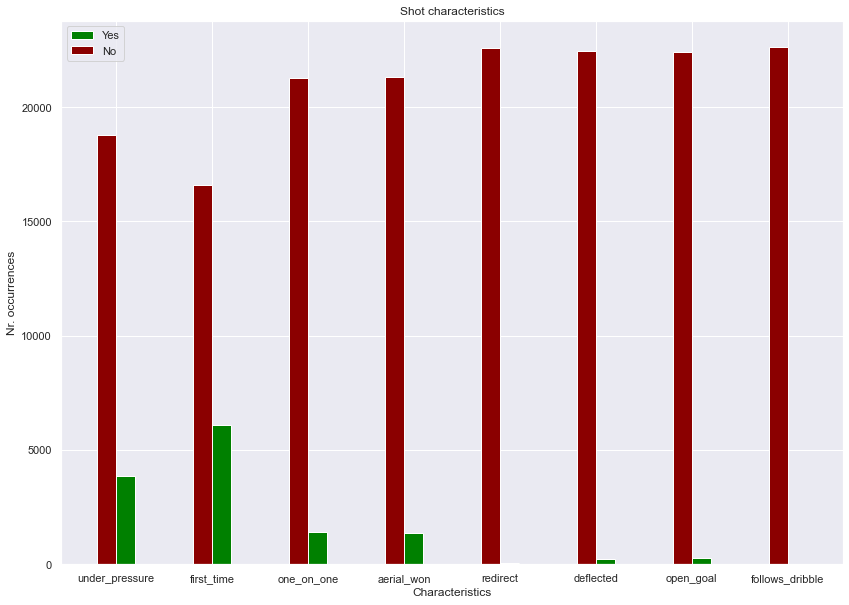

In [10]:
X = ['under_pressure','first_time','one_on_one','aerial_won','redirect','deflected','open_goal','follows_dribble']

non_occurrences = []
occurrences = []

for col in X:
    col_val_counts = df[col].value_counts().sort_index(ascending=True)
    non_occurrences.append(col_val_counts[0])
    occurrences.append(col_val_counts[1])
  
X_axis = np.arange(len(X))

plt.bar(x = X_axis + 0.1, height = occurrences, width = 0.2, label = 'Yes', color='green')
plt.bar(x = X_axis - 0.1, height = non_occurrences, width = 0.2, label = 'No',color='darkred')

  
plt.xticks(X_axis, X)
plt.xlabel("Characteristics")
plt.ylabel("Nr. occurrences")
plt.title("Shot characteristics")
plt.legend()
plt.show()

The plot above depicts the amount of shots that have a certain characteristic compared to not having it. The most commmon characterisitcs a shot can have are being a first-time and shooting under pressure. Follows dribble and redirect are so rare that may not have an influence whatsoever in the outcome.

In [11]:
goals = df.copy()[df["outcome"] == "Goal"]

not_goals = df.copy()[df["outcome"] != "Goal"]

Now I will separate the dataframe in two: Goals and No-Goals and plot the same graph above.

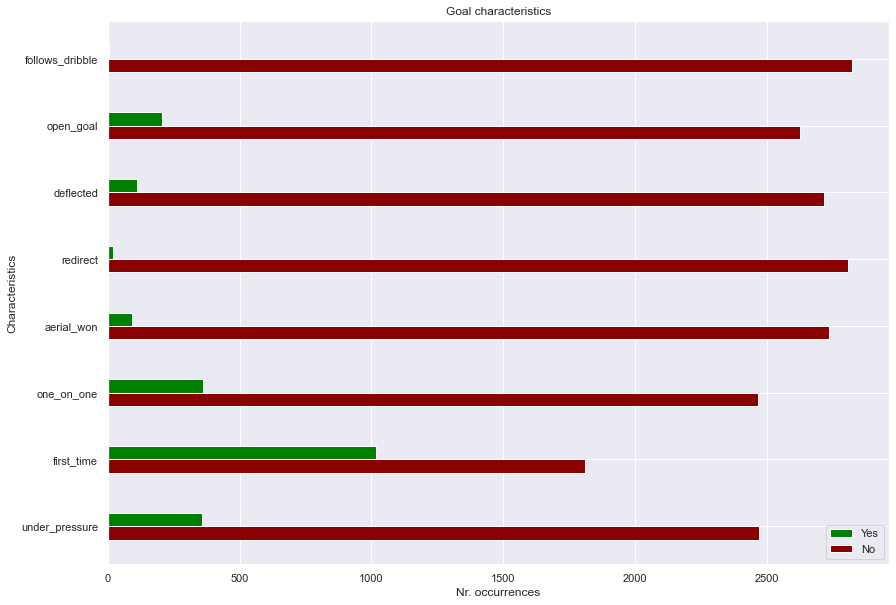

In [12]:
Y = ['under_pressure','first_time','one_on_one','aerial_won','redirect','deflected','open_goal','follows_dribble']

non_occurrences = []
occurrences = []

for col in Y:
    col_val_counts = goals[col].value_counts().sort_index(ascending=True)
    non_occurrences.append(col_val_counts[0])
    occurrences.append(col_val_counts[1])
  
Y_axis = np.arange(len(Y))

plt.barh(Y_axis + 0.1, occurrences, height = 0.2, label = 'Yes', color='green')
plt.barh(Y_axis - 0.1, non_occurrences, height = 0.2, label = 'No',color='darkred')

  
plt.yticks(Y_axis, Y)
plt.xlabel("Nr. occurrences")
plt.ylabel("Characteristics")
plt.title("Goal characteristics")
plt.legend()
plt.show()

Notice how first time shots are close to a 50% chance of becoming a goal. The same applies to one on ones, which despite being relatively uncommon, when a shot is taken under this situation it is mouch more likely to convert. Open goals are also much more likely to occur in agoal rather than any other kind of shot.

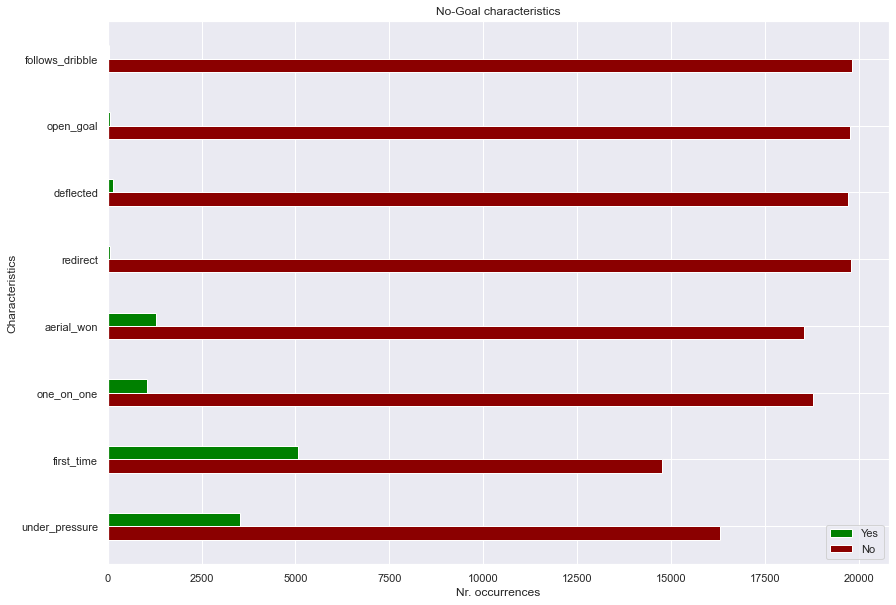

In [13]:
Y = ['under_pressure','first_time','one_on_one','aerial_won','redirect','deflected','open_goal','follows_dribble']

non_occurrences = []
occurrences = []

for col in Y:
    col_val_counts = not_goals[col].value_counts().sort_index(ascending=True)
    non_occurrences.append(col_val_counts[0])
    occurrences.append(col_val_counts[1])
  
Y_axis = np.arange(len(Y))

plt.barh(Y_axis + 0.1, occurrences, height = 0.2, label = 'Yes', color='green')
plt.barh(Y_axis - 0.1, non_occurrences, height = 0.2, label = 'No',color='darkred')

  
plt.yticks(Y_axis, Y)
plt.xlabel("Nr. occurrences")
plt.ylabel("Characteristics")
plt.title("No-Goal characteristics")
plt.legend()
plt.show()

As expected, under pressure shots are more likely not to convert. Almost no missed goal is an open goal shot. However first time shots are also sort of common in missed goals.

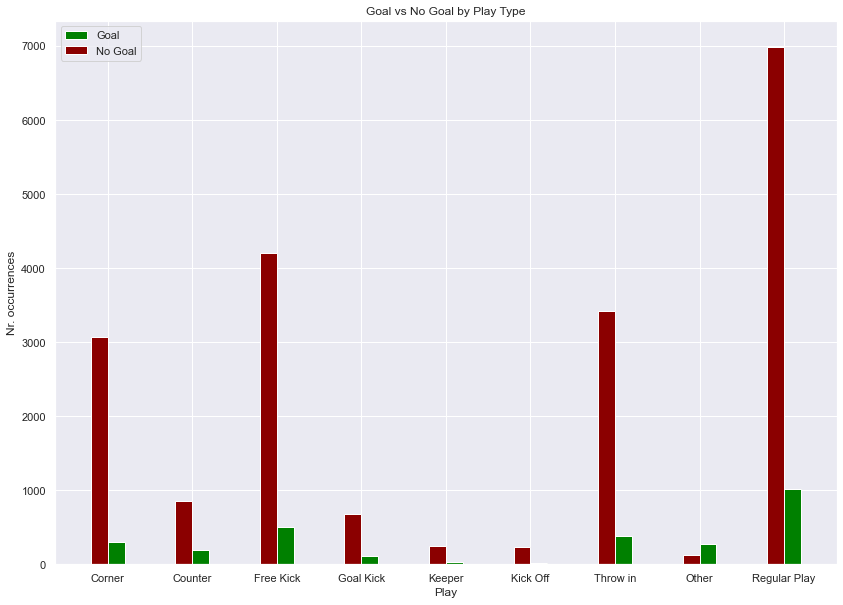

In [14]:
X = ['Corner','Counter','Free Kick','Goal Kick','Keeper','Kick Off','Throw in','Other','Regular Play']
not_goal_plays = [not_play for not_play in not_goals.groupby("play").count().iloc[:,1]]
goal_plays = [not_play for not_play in goals.groupby("play").count().iloc[:,1]]
  
X_axis = np.arange(len(X))

plt.bar(x = X_axis + 0.1, height = goal_plays, width = 0.2, label = 'Goal', color='green')
plt.bar(x = X_axis - 0.1, height = not_goal_plays, width = 0.2, label = 'No Goal',color='darkred')

  
plt.xticks(X_axis, X)
plt.xlabel("Play")
plt.ylabel("Nr. occurrences")
plt.title("Goal vs No Goal by Play Type")
plt.legend()
plt.show()

The plot above displays the shots by source of play with bars for Goals and No-Goals. In relative terms, 'Other' (which includes penalties) are by far the most likely source of play to become a Goal. However, most different types are very similar in terms of converting vs not converting.

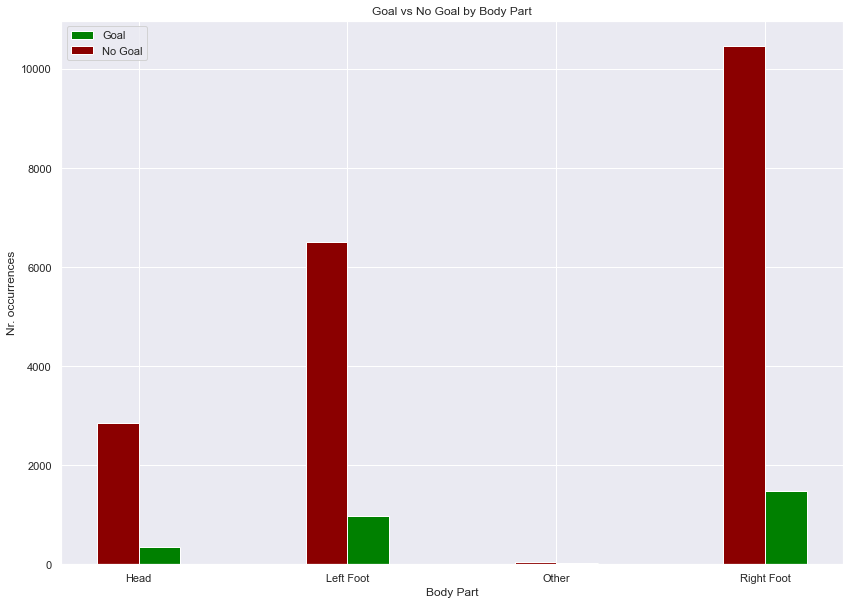

In [15]:
X = df["body_part"].value_counts().sort_index(ascending=True).index.tolist()
not_goal_body = [not_body for not_body in not_goals.groupby("body_part").count().iloc[:,1]]
goal_body = [body for body in goals.groupby("body_part").count().iloc[:,1]]
  
X_axis = np.arange(len(X))

plt.bar(x = X_axis + 0.1, height = goal_body, width = 0.2, label = 'Goal', color='green')
plt.bar(x = X_axis - 0.1, height = not_goal_body, width = 0.2, label = 'No Goal',color='darkred')

  
plt.xticks(X_axis, X)
plt.xlabel("Body Part")
plt.ylabel("Nr. occurrences")
plt.title("Goal vs No Goal by Body Part")
plt.legend()
plt.show()

It appear that most body parts share roughly the same ratio of goal-to-shot. As for category "Other", it is so uncommon that one cannot properly analyze it (only 60 shots in total out of the 22673).

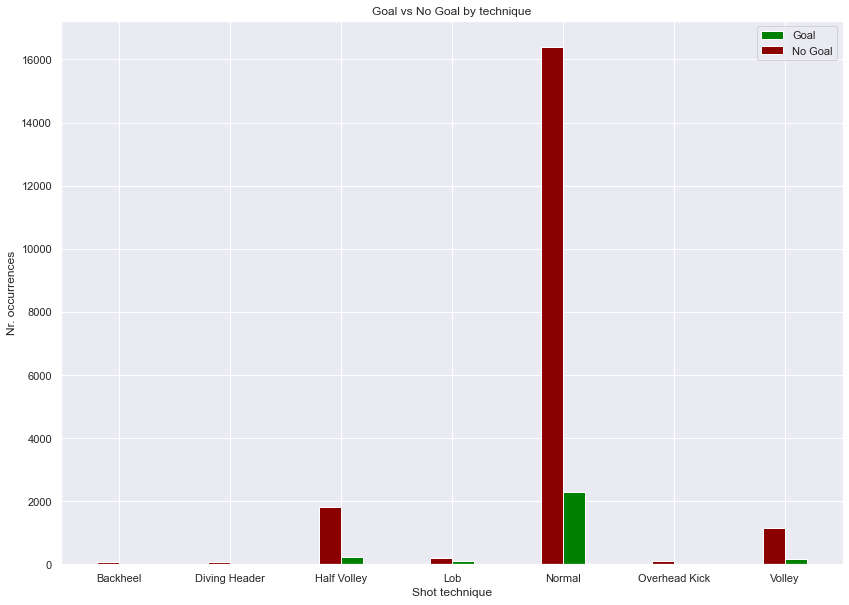

In [16]:
X = df["technique"].value_counts().sort_index(ascending=True).index.tolist()
not_goal_tech = [not_body for not_body in not_goals.groupby("technique").count().iloc[:,1]]
goal_tech = [body for body in goals.groupby("technique").count().iloc[:,1]]
  
X_axis = np.arange(len(X))

plt.bar(x = X_axis + 0.1, height = goal_tech, width = 0.2, label = 'Goal', color='green')
plt.bar(x = X_axis - 0.1, height = not_goal_tech, width = 0.2, label = 'No Goal',color='darkred')

  
plt.xticks(X_axis, X)
plt.xlabel("Shot technique")
plt.ylabel("Nr. occurrences")
plt.title("Goal vs No Goal by technique")
plt.legend()
plt.show()

The most common technique by far is "Normal". However the "lob" shots appear to be incredibly effective.

---

## Data Issues

As detailed in the Intro, this section will be responsible for looking at potential issues with some of our features.

Let's start with the target feature balance. Before doing this step we need to map our target feature "outcome" to 1 if Goal and 0 if it's not a Goal. This step will also be necessary for the heatmap in the final part of this section.

In [17]:
df["outcome"] = df["outcome"].apply(lambda x: 1.0 if x=="Goal" else 0.0)

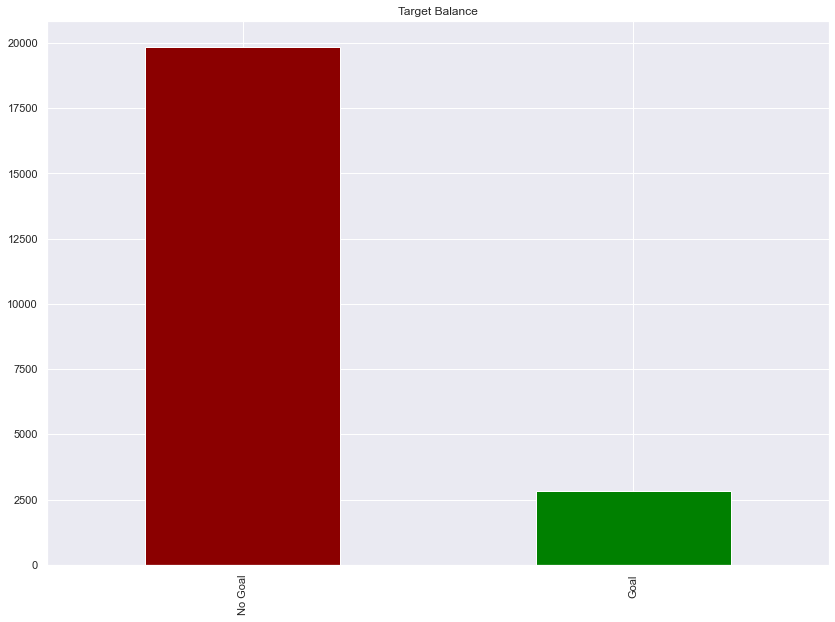

In [18]:
df["outcome"].value_counts().plot(kind='bar',color=['darkred','green'])

plt.xticks(np.arange(2),["No Goal", "Goal"])
plt.title("Target Balance")
plt.show()

Indeed the target feature is quite unbalanced. As expected, Most shots don't ed up being goals. If in our baseline model we see many False Positives, we may have to apply some techiques such as SMOTE to deal with feature imbalance.

Let's take a look at the continuous variables in this dataset. Those are 'duration','location_x' and 'location_y'. Since most algorithms assume that continuous variables are normally distributed, we will assess if that is the case and, if not, perform the necessary transofrmations.

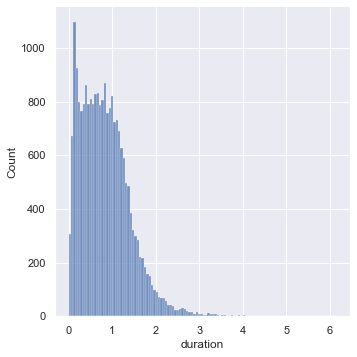

In [19]:
sns.displot(df["duration"])
plt.show()

In [20]:
skew(df["duration"])

1.2609563183692916

From both the distribution plot and the scipy stats skew() function, we can see that "duration" is indeed skewed. The are a few ways to deal with this issue. Let's try log transformation.

In [21]:
log_norm_duration = np.log(df["duration"])

/Users/BernardoFernandes/PycharmProjects/FootAnalytics/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Since the duration tends to be close to zero, its log transformation makes some of the values tend to negative infinity. This makes log transformation impossible. If you try running the code cell below it will raise an error for the same reason.

In [22]:
# If you run this, it will raise an error
#sns.displot(log_norm_duration)
#plt.show()

Let's try another approach: square root transformation.

In [23]:
sqrt_duration = np.sqrt(df["duration"])

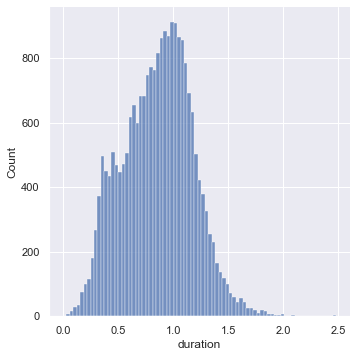

In [24]:
sns.displot(sqrt_duration)
plt.show()

In [25]:
skew(sqrt_duration)

0.09195060771379351

Nice! We managed to remove most of the skew in the feature distribtution. Next up, the "location_x" feature.

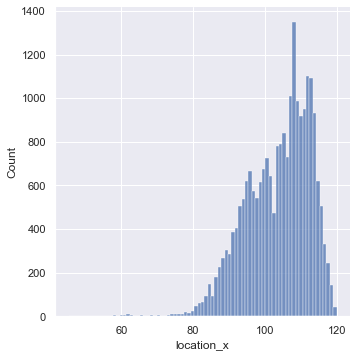

In [26]:
sns.displot(df["location_x"])
plt.show()

In [27]:
skew(df["location_x"])

-0.7727575127305487

This feature looks pretty skewed as well. Let's try the square root transformation again.

In [28]:
sqrt_location_x = np.sqrt(df["location_x"])

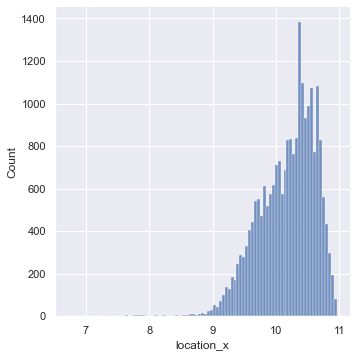

In [29]:
sns.displot(sqrt_location_x)
plt.show()

In [30]:
skew(sqrt_location_x)

-0.9541044538231311

That didn't help. In fact it actually made matters worst. Is there any other alternative? Yes there is. Let me introduce you to the BoxCox transformation.

In [31]:
from scipy.stats import boxcox

# boxcox returns tranformed array[0] and optimal lambda[1]
boxcox_location_x = boxcox(df["location_x"])[0]

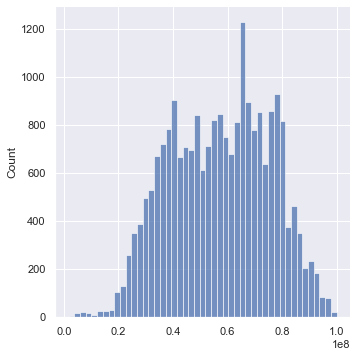

In [32]:
sns.displot(boxcox_location_x)
plt.show()

In [33]:
skew(boxcox_location_x)

-0.1028716431599519

Much better now. Let's look at our last continuous variable: "location_y".

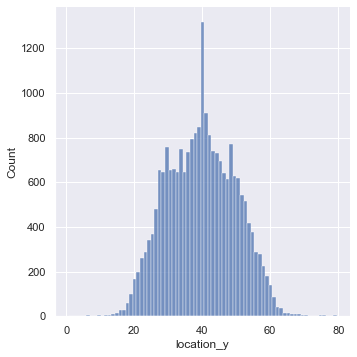

In [34]:
sns.displot(df["location_y"])
plt.show()

In [35]:
skew(df["location_y"])

0.055347092946332686

This one doesn't need any sort of transforamtion. In hind sight, it is sort of expected. Recall from the Pitch plots that most shot tend to happen in the central area and they are distruted along the width of the pitch in relatively even way. This makes the "location_y" (the y coordinate of the pitch) normally distributed.

Now to our final assessment: collinearity. Collinearity between variables occurs when these two are highly correlated with one another. This may result in unreliable predictions. 

A couple of methods come to mind when dealing with such issue. The first is to simply drop one the features. Despite its simplicity, this solution ignores the dropped predictor's signal that may be valuable and is not correlated with the other variable.

Another solution is dimensionality reduction. Among the handful of techniques related to this solution is the Principal Component Analysis(PCA). In simple terms, the PCA is a technique in which you can input two or more correlated variables and it will output a smaller set of variables called principal components that will keep most of the original data's signal thus performing its intended task: to reduce the dimension of the data.

In [36]:
for category in df.select_dtypes(exclude=["int64","float64"]).columns:
    df[category] = pd.Categorical(df[category], categories=df[category].unique()).codes

df

,minute,second,possession,duration,under_pressure,location_x,location_y,play,type,outcome,technique,body_part,first_time,one_on_one,aerial_won,pos,redirect,deflected,open_goal,follows_dribble
0,3,1,10,0.910700,0.0,115.0,34.3,0,0,1.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,5,7,13,0.809100,0.0,108.0,39.9,1,1,1.0,0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
2,7,7,16,0.326300,0.0,94.7,42.4,2,0,0.0,0,1,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0
3,8,3,19,3.355796,0.0,93.7,56.2,3,2,1.0,0,2,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0
4,13,2,25,1.183864,0.0,92.9,29.0,2,0,1.0,0,1,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22668,62,50,131,1.552435,0.0,113.1,39.8,3,0,0.0,4,2,1.0,0.0,0.0,3,0.0,0.0,0.0,0.0
22669,80,28,170,0.883900,0.0,96.8,44.2,3,0,0.0,0,2,0.0,0.0,0.0,7,0.0,0.0,0.0,0.0
22670,82,55,175,1.583279,0.0,83.1,30.1,4,0,0.0,0,1,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
22671,83,53,177,1.309912,1.0,107.1,48.4,2,0,0.0,0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0


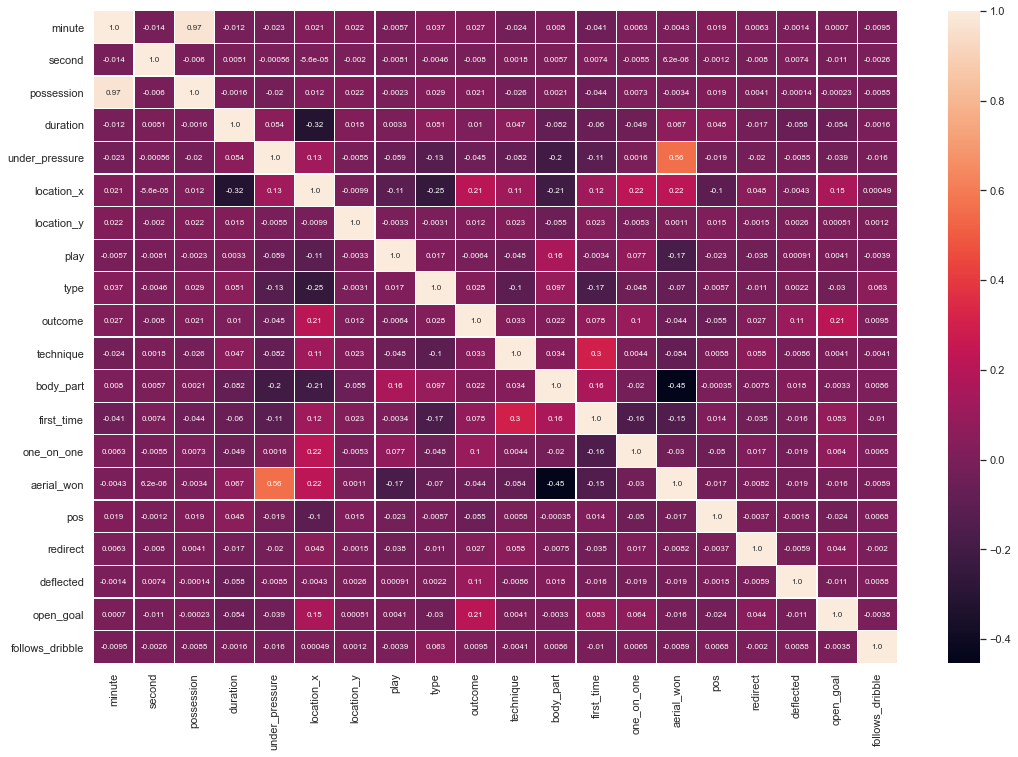

In [37]:

plt.rcParams["figure.figsize"] = (18,12)

plt.xticks(range(len(df.columns)),df.columns,rotation=90)
plt.yticks(range(len(df.columns)),df.columns)
sns.heatmap(df.corr(),annot=True, cbar=True, fmt=".2",linewidths=.2)

plt.show()

A few of these features display a high correlation with one another. The highest correlated features are by far "minute" and "possession". "Minute" will be the feature to be dropped for the simple reason that dropping it means that "second" may also be dropped as both complement each. In performance terms, dropping two columns which do not add much signal is much better than just dropping one. The correlation between "aerial_won" and "under_pressure" is 0.56. Furthermore, there are a few features where correlation merely uninterpretable. For instance, "technique" and "body_part" are categorical and are not mapped in a meaningful manner. Whether a "Normal" shot is encoded to 1 and "Volley" is encoded to 2 or vice-versa, this should not matter for the algorithm. When building a model, this sort of features should be one-hot encoded.